# Optimizer Comparison Exercise
## Objective
Explore how different optimization algorithms affect the training of neural networks.

## Background
Optimizers are algorithms or methods used to change the attributes of the neural network, such as weights and learning rate, to reduce the losses. Common optimizers include SGD (Stochastic Gradient Descent), Mini-batch SGD, Momentum, Adam, and RMSProp.


# Part 1: Classification task

## Setup
Start by importing necessary libraries and preparing a simple dataset.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Load or create a dataset
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


2023-11-30 10:49:00.447928: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-30 10:49:00.448037: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-30 10:49:00.449741: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-30 10:49:00.472270: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-30 10:49:02.087650: W tensorflow/compiler/tf2

## Building the Neural Network
Define a function to create a basic neural network. This function will take an optimizer as an argument. Define the network yourself with 2 hidden layers using 64 nodes each. They should both use relu as activation function. Dont forget the output layer which, for a binary classification problem should use what activation function?


In [2]:
def build_model(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=(20,))) 
    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

## Experimentation
Experiment with different optimizers. For each optimizer, train the model and plot its accuracy and loss.

### Task:
1. Try the following optimizers: 'sgd', 'adam', 'rmsprop', and a custom SGD with Momentum. (adam has addaptive lr so given is only the start value)
2. For the custom SGD with Momentum, use: tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
3. Train each model for a fixed number of epochs (e.g., 30) and evaluate its performance on the test set.
4. Do step 1-3 same, but change batch size. sätt batchsize i fit()

In [3]:
optimizers = ['sgd', 'adam', 'rmsprop', 'SGD_momentum']
histories = {}

for opt in optimizers:
    print(f"Training with optimizer: {opt}")
    if opt=="SGD_momentum": 
        model = build_model(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
    else:
        model = build_model(opt)
    history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test), batch_size = None, verbose=0)
    histories[str(opt)] = history


Training with optimizer: sgd
Training with optimizer: adam
Training with optimizer: rmsprop
Training with optimizer: SGD_momentum


In [4]:
histories

{'sgd': <keras.src.callbacks.History at 0x7f84d032e380>,
 'adam': <keras.src.callbacks.History at 0x7f84c8757670>,
 'rmsprop': <keras.src.callbacks.History at 0x7f84c81f4130>,
 'SGD_momentum': <keras.src.callbacks.History at 0x7f84b063e440>}

## Visualization
Plot the training and validation accuracy and loss for each optimizer.

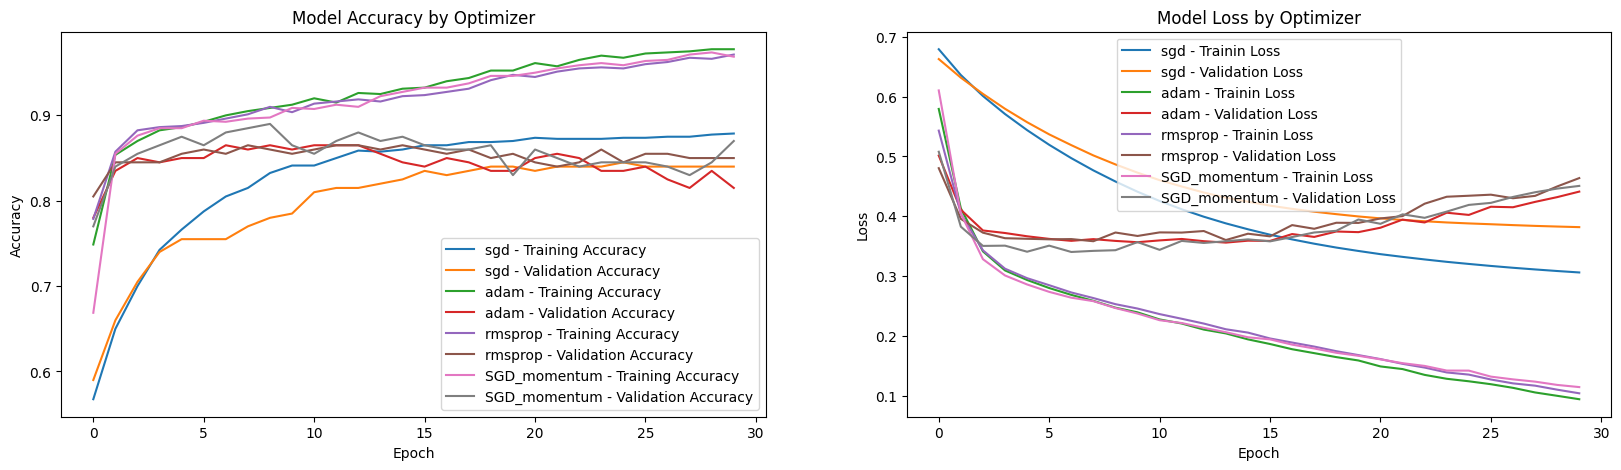

In [5]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
for opt, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{opt} - Training Accuracy')
    plt.plot(history.history['val_accuracy'], label=f'{opt} - Validation Accuracy')
plt.title('Model Accuracy by Optimizer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
for opt, history in histories.items():
    plt.plot(history.history['loss'], label=f'{opt} - Trainin Loss')
    plt.plot(history.history['val_loss'], label=f'{opt} - Validation Loss')
plt.title('Model Loss by Optimizer')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


## Analysis and Questions
* Which optimizer provided the fastest convergence?
* Which optimizer achieved the highest accuracy on the validation set?
* Discuss the possible reasons behind the performance differences observed.\
=> SGD best


# Part 2: Regression task
Now, let's apply the same set of optimizers to a regression problem.

## Setup for Regression
Import libraries and prepare a regression dataset. For simplicity, let's use a synthetic dataset.

In [6]:
from sklearn.datasets import make_regression

# Generate synthetic data for regression
X_reg, y_reg = make_regression(n_samples=500, n_features=2, noise=15, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3, random_state=42)


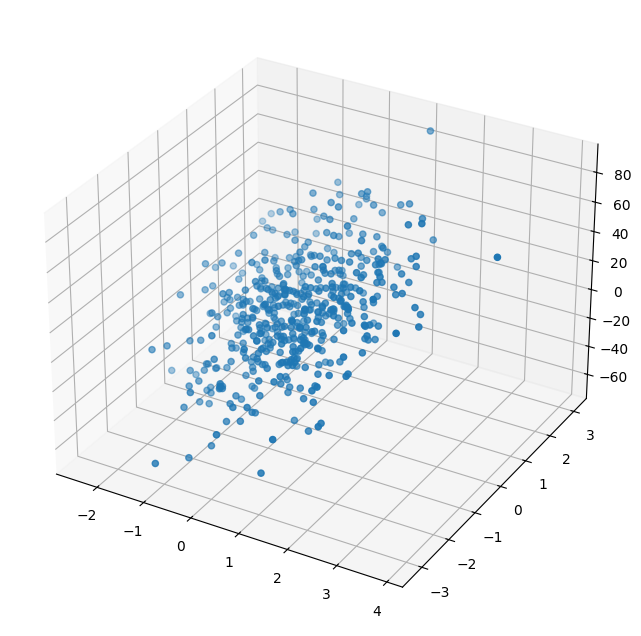

In [7]:
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection ="3d")
ax.scatter(X_reg[:,0], X_reg[:,1], y_reg)
plt.show();

## Define the Neural Network Model for Regression
Create a function to build a neural network model suitable for regression. Use 2 hidden layeres of 10 nodes each both using relu activations. Dont forget the output layer. For regression it is recommended to use MSE as loss and metric.

In [8]:
def build_model_regression(optimizer):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Dense(10, activation='relu', input_shape=(2,))) 
    model.add(tf.keras.layers.Dense(10, activation='relu'))
    model.add(tf.keras.layers.Dense(1, activation='linear'))
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model


## Experiment with Different Optimizers for Regression
Repeat the same process as in the classification task, but now for regression.


In [9]:
history_dict_reg = {}

for opt in optimizers:
    print(f"Training (Regression) with optimizer: {opt}")
    if opt=="SGD_momentum": 
        model = build_model_regression(tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9))
    else:
        model = build_model_regression(opt)
    history = model.fit(X_train_reg, y_train_reg, epochs=120, validation_split=0.2, verbose=0)
    history_dict_reg[opt] = history

    # Evaluate the model
    test_loss, test_mse = model.evaluate(X_test_reg, y_test_reg, verbose=0)
    print(f"Test MSE with {opt}: {test_mse:.4f}\n")


Training (Regression) with optimizer: sgd
Test MSE with sgd: 361.8426

Training (Regression) with optimizer: adam
Test MSE with adam: 239.5596

Training (Regression) with optimizer: rmsprop
Test MSE with rmsprop: 236.6085

Training (Regression) with optimizer: SGD_momentum
Test MSE with SGD_momentum: 447.9228



In [10]:
history_dict_reg

{'sgd': <keras.src.callbacks.History at 0x7f84b1a1bac0>,
 'adam': <keras.src.callbacks.History at 0x7f84b1c43940>,
 'rmsprop': <keras.src.callbacks.History at 0x7f84b1b9d150>,
 'SGD_momentum': <keras.src.callbacks.History at 0x7f84b18f3610>}

In [11]:
history.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [12]:
model.metrics_names

['loss', 'mse']

## Visualization of Results for Regression
Plot the training and validation loss (MSE) for each optimizer.

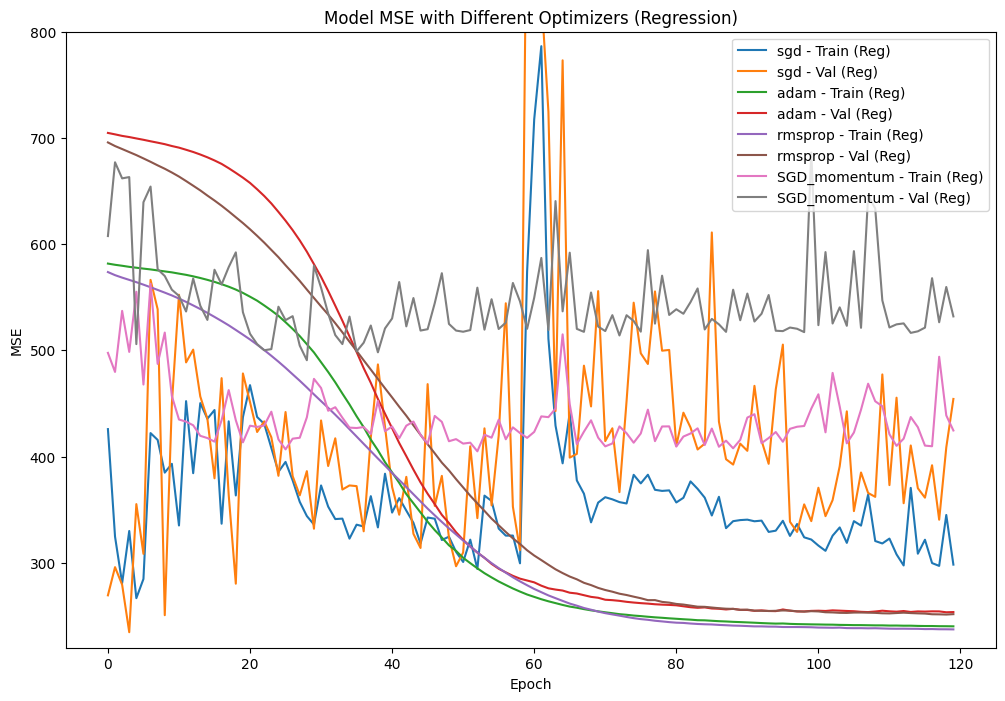

In [13]:
plt.figure(figsize=(12, 8))
for opt, history in history_dict_reg.items():
    plt.plot(history.history['mse'], label=f'{opt} - Train (Reg)')
    plt.plot(history.history['val_mse'], label=f'{opt} - Val (Reg)')

plt.title('Model MSE with Different Optimizers (Regression)')
plt.ylabel('MSE')
plt.ylim(220, 800)
plt.xlabel('Epoch')
plt.legend()
plt.show()


SGD_momentum exploding gradien but comes back, sgd does nothing the first 120 epoches, adam and rmsprop ok

## Analysis and Questions
* Compare the performance of the optimizers between the classification and regression tasks.
* Did certain optimizers perform better on one task than the other? Why might this be?
* Discuss the implications of these findings for selecting optimizers in real-world applications.\
=> Adam best

## Conclusion
Reflect on the importance of understanding the strengths and limitations of different optimizers in relation to the specific nature of the problem and dataset.